# ==============================
# Model-based Clustering (GMM)
# ============================== 
# Este notebook aplica o algoritmo Gaussian Mixture Model (GMM)
# aos dados estelares normalizados, avaliando o desempenho com
# Silhouette Score e visualizando os clusters via PCA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# ------------------------------
# 2. Carregar dados processados
# ------------------------------

X_scaled = pd.read_csv("../results/X_scaled.csv", index_col=0)

In [ ]:
# ------------------------------
# 3. Aplicar Gaussian Mixture Model
# ------------------------------

# n_components: número de componentes gaussianas (clusters)
n_components = 7

gmm = GaussianMixture(
    n_components=n_components,
    covariance_type="full",
    random_state=42
)

labels_gmm = gmm.fit_predict(X_scaled)

In [ ]:
# ------------------------------
# 4. Avaliação (Silhouette Score)
# ------------------------------

sil_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Silhouette Score (GMM): {sil_gmm:.3f}")

Silhouette Score (GMM): 0.781


In [ ]:
# ------------------------------
# 5. Salvar resultado
# ------------------------------

results_gmm = pd.DataFrame({
    "Algoritmo": ["Gaussian Mixture Model (GMM)"],
    "Silhouette Score": [sil_gmm]
})

results_gmm.to_csv("../results/gmm_results.csv", index=False)

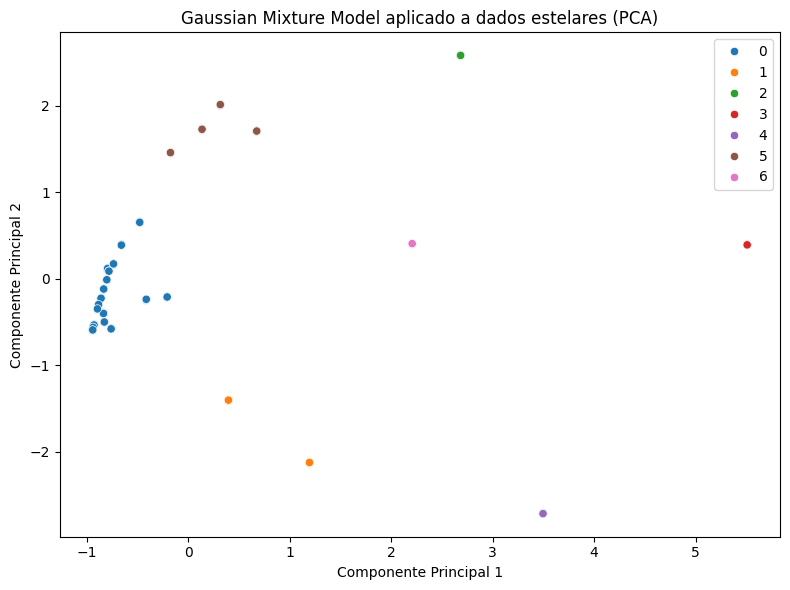

In [ ]:
# ------------------------------
# 6. Visualização com PCA
# ------------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_gmm,
    palette="tab10",
    legend="full"
)

plt.title("Gaussian Mixture Model aplicado a dados estelares (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------
# Salvar labels - GMM
# ------------------------------

import pandas as pd
from sklearn.mixture import GaussianMixture

X_scaled = pd.read_csv("../results/X_scaled.csv", index_col=0)

gmm = GaussianMixture(
    n_components=7,
    covariance_type="full",
    random_state=42
)

labels_gmm = gmm.fit_predict(X_scaled)

labels_gmm_df = pd.DataFrame(
    labels_gmm,
    index=X_scaled.index,
    columns=["cluster_gmm"]
)

labels_gmm_df.to_csv("../results/labels_gmm.csv")